In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
DATA_PATH = "/content/drive/MyDrive/Project3_EcommerceAnalysis/data/processed/ecommerce_cleaned.csv"

df = pd.read_csv(DATA_PATH)
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


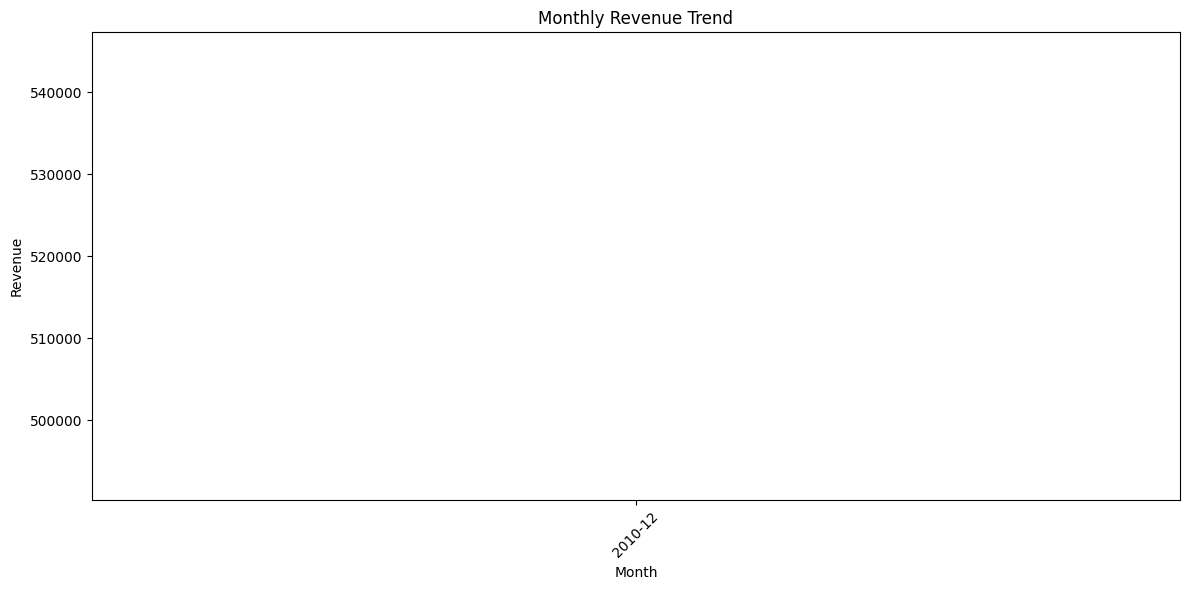

In [5]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["Month"] = df["InvoiceDate"].dt.to_period("M")

monthly_revenue = df.groupby("Month")["Revenue"].sum().reset_index()
monthly_revenue["Month"] = monthly_revenue["Month"].astype(str)
plt.figure(figsize=(12,6))
plt.plot(monthly_revenue["Month"], monthly_revenue["Revenue"])
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()




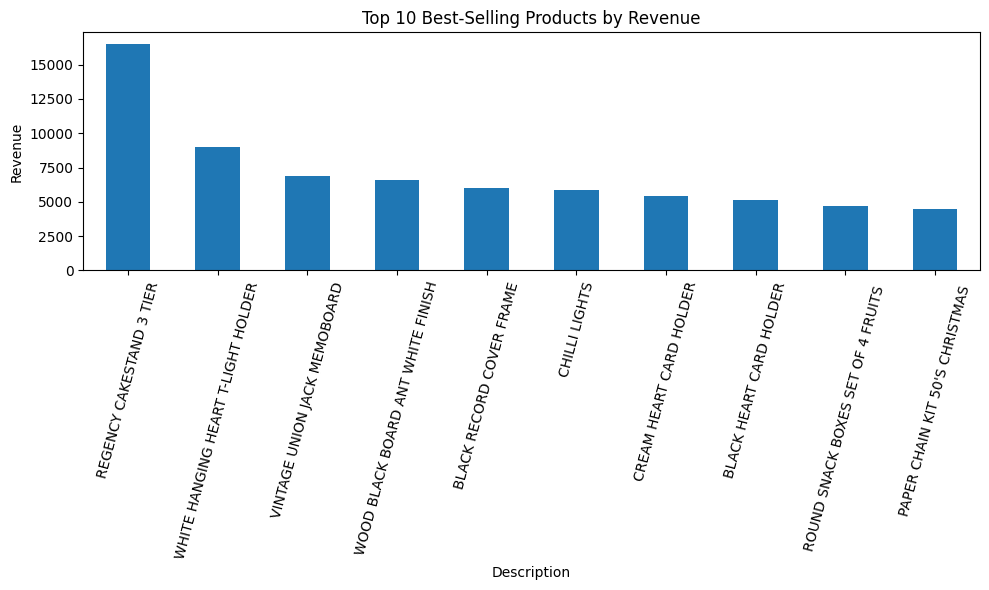

In [12]:
top_products = (
    df.groupby("Description")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products
plt.figure(figsize=(10,6))
top_products.plot(kind="bar")
plt.title("Top 10 Best-Selling Products by Revenue")
plt.ylabel("Revenue")
plt.xticks(rotation=75)
plt.tight_layout()
plt.savefig(
    "/content/drive/MyDrive/Project3_EcommerceAnalysis/visuals/charts/top_10_best-selling_products.png",
    dpi=300
)
plt.show()


In [7]:
customer_orders = df.groupby("CustomerID")["InvoiceNo"].nunique()
customer_orders.describe()


,InvoiceNo
count,837.000000
mean,1.519713
std,1.815314
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,34.000000


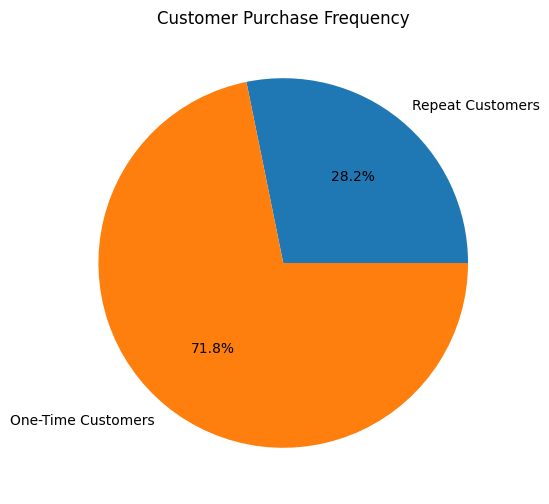

In [13]:
repeat_customers = (customer_orders > 1).sum()
one_time_customers = (customer_orders == 1).sum()

repeat_customers, one_time_customers
plt.figure(figsize=(6,6))
plt.pie(
    [repeat_customers, one_time_customers],
    labels=["Repeat Customers", "One-Time Customers"],
    autopct="%1.1f%%"
)
plt.title("Customer Purchase Frequency")
plt.savefig(
    "/content/drive/MyDrive/Project3_EcommerceAnalysis/visuals/charts/customer_purchase_freq.png",
    dpi=300
)
plt.show()


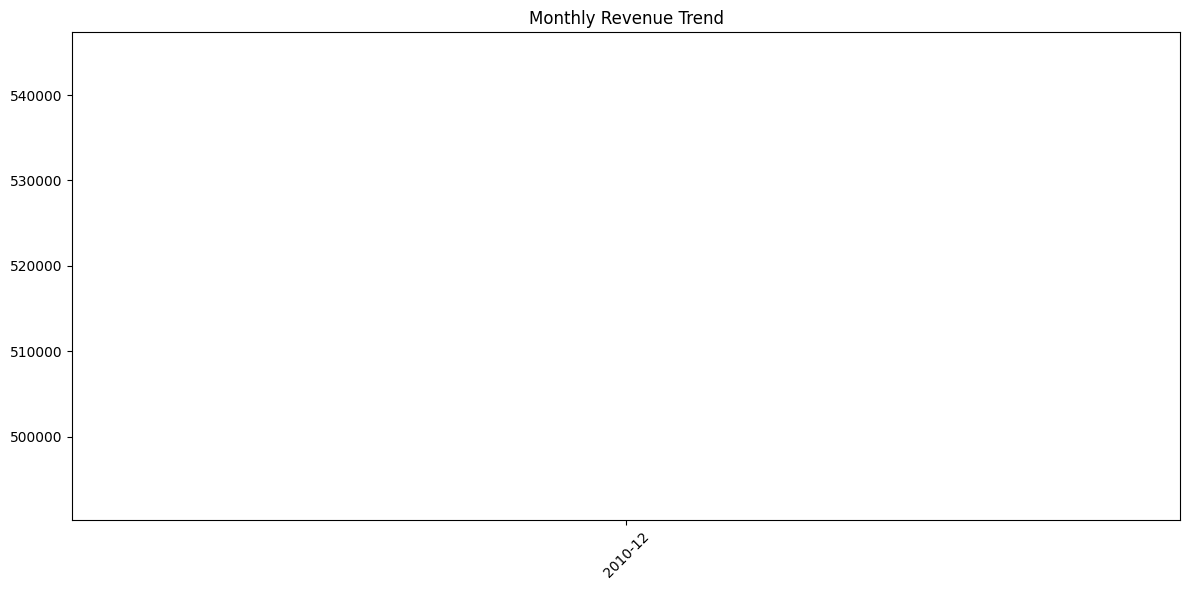

In [11]:
plt.figure(figsize=(12,6))
plt.plot(monthly_revenue["Month"], monthly_revenue["Revenue"])
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.tight_layout()
plt.savefig(
    "/content/drive/MyDrive/Project3_EcommerceAnalysis/visuals/charts/monthly_revenue.png",
    dpi=300
)
plt.show()
